In [17]:
# Homework 2 Part 1 (due 7/07/2024)

# Multivariate linear regression with within-sample validation

### Objective
In this project, you will identify relationships between variables via single-variable and multivariable linear regression using the python library `sci-kit learn`. You will practice assessing the model fit within sample and out of sample.

### Step 1
The following code snippet (1) loads the diabetes dataset from the sci-kit learn package, (2) fits a linear regression to the first variable in that data set, (3) calculate a t statistics for the estimated model parameters, (4) calculates the within-sample R2, and (5) plots the data and the model. Review and test the code.

### Step 2
Write code that  fits a linear models for EACH INDEPENDENT VARIABLE in the data set. For each of the resulting models, (1) calculate a t statistic for the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2. Plot the results for the model that has the best quality of fit.

### Step 3
Write code that  fits a multivariate linear model for ALL INDEPENDENT VARIABLE in the data set. (1) calculate an f statistic on the estimated model parameters, (2) calculate the within-sample RSS, MSE, RSE, and R^2.

### Step 4
Test the information content of each variable in the multivariate model by calculating an f statistic with respect to a reduced model. Are the three variables with the highest f statistic also the variables with the best-fitting single-variable models? Explain what may lead to differences in the variable rankings.

### Step 5
Look up how to use the function `train_test_split` from `sklearn.model_selection` split a dataset into a training set and a test set. Repeat steps 2 and 3 on the training set. For each model, also calculate RSS, MSE, RSE, and R2 on the test set. For each linear model, comment on how RSE and R2 change when moving from the training set to the test. 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm                      #for the t statistic

In [19]:
# Read-in the diabetes dataset as a pandas DataFrame
diabetes = datasets.load_diabetes(as_frame=True)

# Get independent variables
X = diabetes.data

# Get dependent variable
y = diabetes.target

# Let's look at the data
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


[304.18307453]
R2 0.03530218264671636


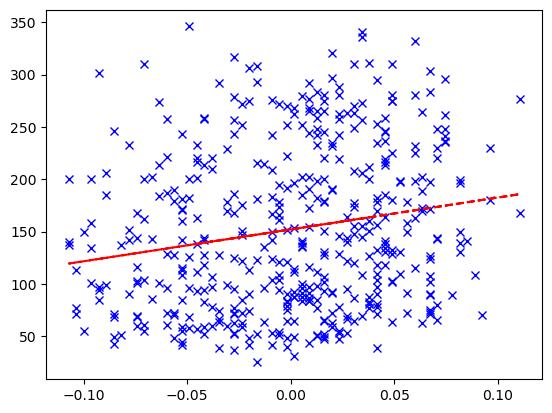

In [20]:
# initialize model
model = LinearRegression()

# get variable names from column header in the data frame
var_names = X.columns

# select first variable
var_name1 = var_names[0]

# select data associated with the first variable
x1 = X[var_name1]

# turn that dataframe column into a nx1 numpy array
x1_data = np.array([x1.to_numpy()]).T

# fit model
_ = model.fit(x1_data,y.to_numpy())

# get model predictions for each x value
yHat = model.predict(x1_data)

# get residuals
resid = yHat-y

print(model.coef_)

# get R2 value
R2 = model.score(x1_data,y)
print('R2', R2)

# make a plot
plt.subplot(111)

# plot data
plt.plot(x1, y, marker='x', lw=0, color='blue')

# plot fit
plt.plot(x1, yHat, ls='--', color='red')

#### Step 2

Let's write a function that iterates through the dataframe of independent variables, fits them to the target and spits out the five statistics of interest.

In [21]:
def univariate_lm(data, target):
    #a dictionary where we will save all the results and the model itself
    results = {}
    target_reshaped = target.to_numpy()

    #iterate through independent variables
    for col_name, col_data in data.items():
        #shape all data to properly put into the model
        col_data_reshaped = np.array([col_data.to_numpy()]).T

        #fit the current IV
        model = LinearRegression().fit(col_data_reshaped, target_reshaped)

        #predict
        y_pred = model.predict(col_data_reshaped)

        #compute RSS by definition
        rss = ((target_reshaped - y_pred)**2).sum()

        #compute MSE
        mse = mean_squared_error(target_reshaped, y_pred)

        #compute RSE by definition
        n = len(target_reshaped)
        p = 1   #we have only one predictor per the setup of the problem
        rse = np.sqrt(rss / (n - p - 1))

        #R^2 like MSE can be calculated via sci-kit function
        r2 = model.score(col_data_reshaped, target_reshaped)

        #t-statistic is trickier: it is coeff estimate divided by the standard error of the coefficient, the latter not given by sci-kit directly
        #so we will have to compute the SE(beta) ourselves
        coeff = model.coef_     #in our case it's just one, since we have only one IV
        X_with_intercept = np.hstack((np.ones((n, 1)), col_data_reshaped))
        variance_estimate = rss / (n - 2)
        XTX_inv = np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))
        std_error = np.sqrt(variance_estimate * XTX_inv[1, 1])

        t_stat = coeff/std_error

        #add to results
        #   key : the name of IV
        #   values: A DICTIONARY of all the quality of fit metrics and a key-value for the model itself
        results[col_name] = {
            'model' : model, 
            'rss' : rss, 
            'mse' : mse, 
            'rse' : rse, 
            'r2' : r2, 
            't_stat' : t_stat
        }

    return results

diabetes_uni_results = univariate_lm(X, y)

Now that we have all the models and their quality of fir measure, it is time to choose the best, according to one of the metrics. Let's right a function for that.

While we expect that if a model is better on one of the metrcis, it would probably be better on the rest, it is not guaranteed. Thus, we include an argument for metric choice, by default set to 'r2'.

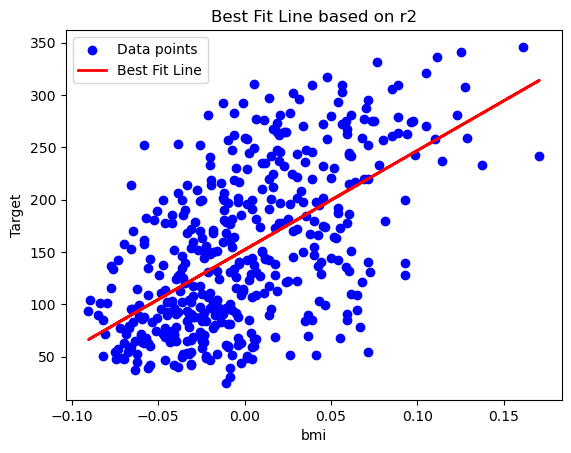

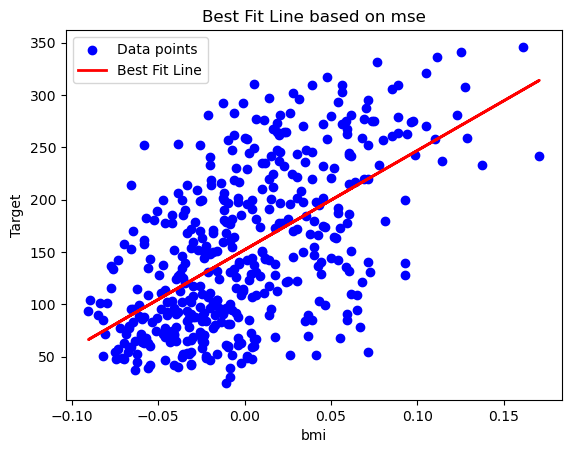

In [22]:
def plot_best_fit(data, target, results, metric='r2'):
    best_metric_value = -float('inf') if metric == 'r2' else float('inf')  # Initialize based on whether higher is better

    best_model_name = None
    best_model = None
    best_x = None

    for col_name, result in results.items():
        current_metric = result.get(metric)

        # Adjust comparison based on metric type (higher is better for R-squared, lower for MSE and RSE)
        if (metric == 'r2' and current_metric > best_metric_value) or (metric in ['mse', 'rse'] and current_metric < best_metric_value):
            best_metric_value = current_metric
            best_model_name = col_name
            best_model = result.get('model')
            best_x = data[col_name].to_numpy()

    if best_model_name:
        # Plot the best-fit line
        y_pred = best_model.predict(best_x.reshape(-1, 1))
        
        plt.scatter(best_x, target, color='blue', label='Data points')
        plt.plot(best_x, y_pred, color='red', linewidth=2, label='Best Fit Line')
        plt.xlabel(best_model_name)
        plt.ylabel('Target')
        plt.title(f'Best Fit Line based on {metric}')
        plt.legend()
        plt.show()

    return best_model_name, best_model

# Diabetes IVs results assessed by r2 and MSE
best_model_name, best_model = plot_best_fit(X, y, diabetes_uni_results, metric='r2')
best_model_name, best_model = plot_best_fit(X, y, diabetes_uni_results, metric='mse')


#### Step 3

Let's take a look at the multilinear regression now. The code doesn't really differe from the example in the beginning, there are just more variables, which LinearRegression() handles on its own.

Easy to compute definition of the F-statistic for multiple linear regression can be found [here](https://analystprep.com/cfa-level-1-exam/quantitative-methods/coefficient-of-determination-and-f-statistic/).

In [23]:
def multivariate_lm(X, y):
    # Fit multivariate linear regression model
    model = LinearRegression().fit(X, y)

    # Get model predictions
    y_pred = model.predict(X)

    # Number of observations (n) and number of predictors (p)
    n, p = X.shape

    # Residual sum of squares (RSS)
    rss = np.sum((y - y_pred)**2)

    # Mean squared error (MSE)
    mse = mean_squared_error(y, y_pred)

    # Residual standard error (RSE)
    rse = np.sqrt(rss / (n - p - 1))

    # R-squared (R^2)
    r2 = model.score(X, y)

    # F-statistic
    # Calculate mean of y
    y_mean = np.mean(y)
    # Total sum of squares (TSS)
    tss = np.sum((y - y_mean)**2)
    # Calculate F-statistic
    f_statistic = (tss - rss) / p / (rss / (n - p - 1))

    # Return results as a dictionary
    results = {
        'model': model,
        'rss': rss,
        'mse': mse,
        'rse': rse,
        'r2': r2,
        'f_statistic': f_statistic
    }

    return results

diabetes_multi_results = multivariate_lm(X, y)

# Print results
print(f"RSS: {diabetes_multi_results['rss']}")
print(f"MSE: {diabetes_multi_results['mse']}")
print(f"RSE: {diabetes_multi_results['rse']}")
print(f"R-squared (R^2): {diabetes_multi_results['r2']}")
print(f"F-statistic: {diabetes_multi_results['f_statistic']}")


RSS: 1263985.7856333437
MSE: 2859.6963475867506
RSE: 54.15423932805569
R-squared (R^2): 0.5177484222203498
F-statistic: 46.27243958524319


#### Step 4

First, we need to fit the full model once, and then iterate over each variable and fit the reduced models. After computing each reduced model we must also calculate the F-statistic comparing the reduced model against the full one. Then we can compare the F-statistic rankings to the earlier computed best-fitting univariate linear models.

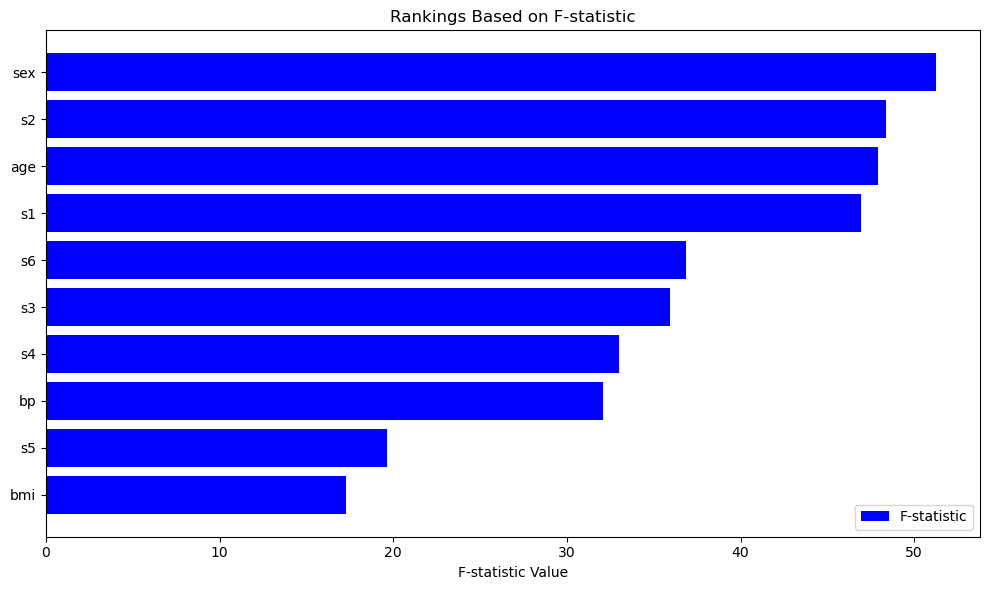

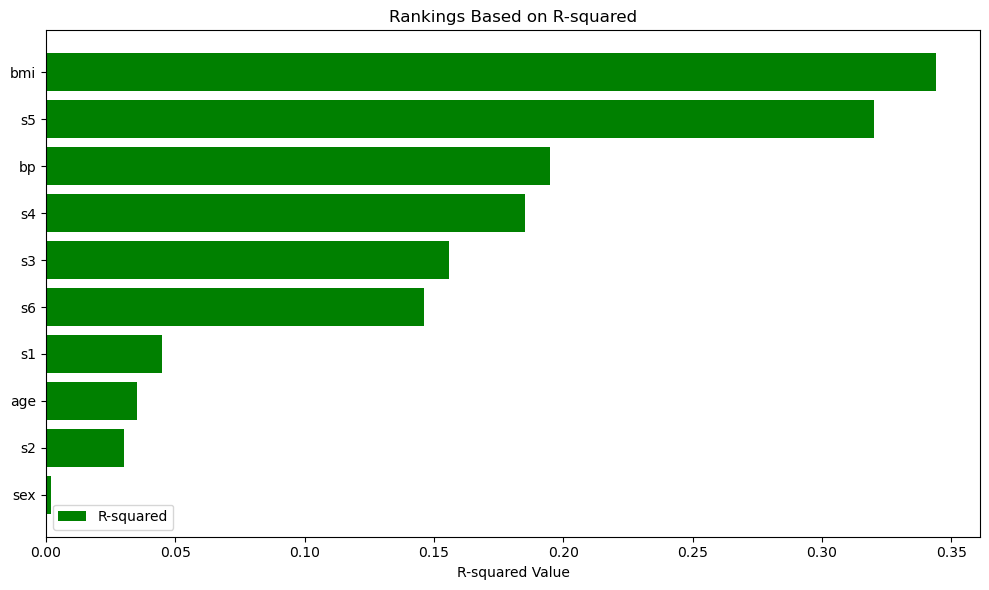

In [24]:
def calculate_f_statistic(X, y):
    n, p = X.shape
    # We will save F-statistics in a dictionay for each model
    f_statistics = {}

    # Fit full model first
    model_full = LinearRegression().fit(X, y)
    y_pred_full = model_full.predict(X)
    RSS_full = np.sum((y - y_pred_full)**2)
    DF_full = n - p - 1

    # Fit reduced models
    for col_name in X.columns:
        # Extract current variable as a single-column DataFrame
        X_reduced = X[[col_name]]

        # Fit reduced model (just the current variable)
        model_reduced = LinearRegression().fit(X_reduced, y)
        y_pred_reduced = model_reduced.predict(X_reduced)
        RSS_reduced = np.sum((y - y_pred_reduced)**2)
        DF_reduced = n - 2

        # Calculate F-statistic
        F_statistic = ((RSS_reduced - RSS_full) / (DF_reduced - DF_full)) / (RSS_full / DF_full)

        # Store F-statistic for current variable
        f_statistics[col_name] = F_statistic 

    return f_statistics

diabetes_f_statistics = calculate_f_statistic(X, y)

# Step 3: Rank variables based on F-statistic and R-squared
rank_f_statistic = sorted(diabetes_f_statistics, key=diabetes_f_statistics.get, reverse=True)
rank_r2 = sorted(diabetes_uni_results, key=lambda x: diabetes_uni_results[x]['r2'], reverse=True)

# Plotting F-statistic rankings
plt.figure(figsize=(10, 6))
plt.barh(range(len(rank_f_statistic)), [diabetes_f_statistics[var] for var in rank_f_statistic], align='center', color='blue', label='F-statistic')
plt.yticks(range(len(rank_f_statistic)), rank_f_statistic)
plt.xlabel('F-statistic Value')
plt.title('Rankings Based on F-statistic')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rank on top
plt.legend()
plt.tight_layout()
plt.show()

# Plotting R-squared rankings
plt.figure(figsize=(10, 6))
plt.barh(range(len(rank_r2)), [diabetes_uni_results[var]['r2'] for var in rank_r2], align='center', color='green', label='R-squared')
plt.yticks(range(len(rank_r2)), rank_r2)
plt.xlabel('R-squared Value')
plt.title('Rankings Based on R-squared')
plt.gca().invert_yaxis()  # Invert y-axis to display highest rank on top
plt.legend()
plt.tight_layout()
plt.show()

The differences in ranking result from several factors:
* 1. multicollinearity of variables in the multivariate model that impacts the F-statistic rankings;
* 2. the contribution of variables with higher F-ststatistic is considered alongside other variables, as opposed to the contribution on their won like in the univariate regression case;
* 3. interaction affects/complexity that changes the relative importance of the variable.

#### Step 5, part a: univariate linear regressions

In [36]:
# Function to perform univariate linear regression on training and test sets
def univariate_lm_train_test_split(data, target, test_size=0.4):
    # Split data into training and test sets
    y = target.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=test_size, random_state=23)

    results_train = {}
    results_test = {}

    # Iterate through independent variables
    for col_name, col_data in X_train.items():
        col_data_train = np.array([col_data.to_numpy()]).T
        col_data_test = np.array([X_test[col_name].to_numpy()]).T
        
        # Fit the model on training data
        model = LinearRegression().fit(col_data_train, y_train)

        # Predict on training and test sets
        y_pred_train = model.predict(col_data_train)
        y_pred_test = model.predict(col_data_test)

        # Compute RSS on training set
        rss_train = ((y_train - y_pred_train)**2).sum()

        # Compute MSE on training set
        mse_train = mean_squared_error(y_train, y_pred_train)

        # Compute RSE on training set
        n_train = len(y_train)
        p = 1  # Number of predictors (univariate)
        rse_train = np.sqrt(rss_train / (n_train - p - 1))

        # Compute R2 on training set
        r2_train = model.score(col_data_train, y_train)

        # Compute RSS, MSE, RSE, and R2 on test set
        rss_test = ((y_test - y_pred_test)**2).sum()
        mse_test = mean_squared_error(y_test, y_pred_test)
        n_test = len(y_test)
        rse_test = np.sqrt(rss_test / (n_test - p - 1))
        r2_test = model.score(col_data_test, y_test)

        # Store results for training and test sets
        results_train[col_name] = {
            'model': model,
            'rss': rss_train,
            'mse': mse_train,
            'rse': rse_train,
            'r2': r2_train
        }

        results_test[col_name] = {
            'model': model,
            'rss': rss_test,
            'mse': mse_test,
            'rse': rse_test,
            'r2': r2_test
        }

    return results_train, results_test

diabetes_results_train, diabetes_results_test = univariate_lm_train_test_split(X, y)

##### Visual comparison is best

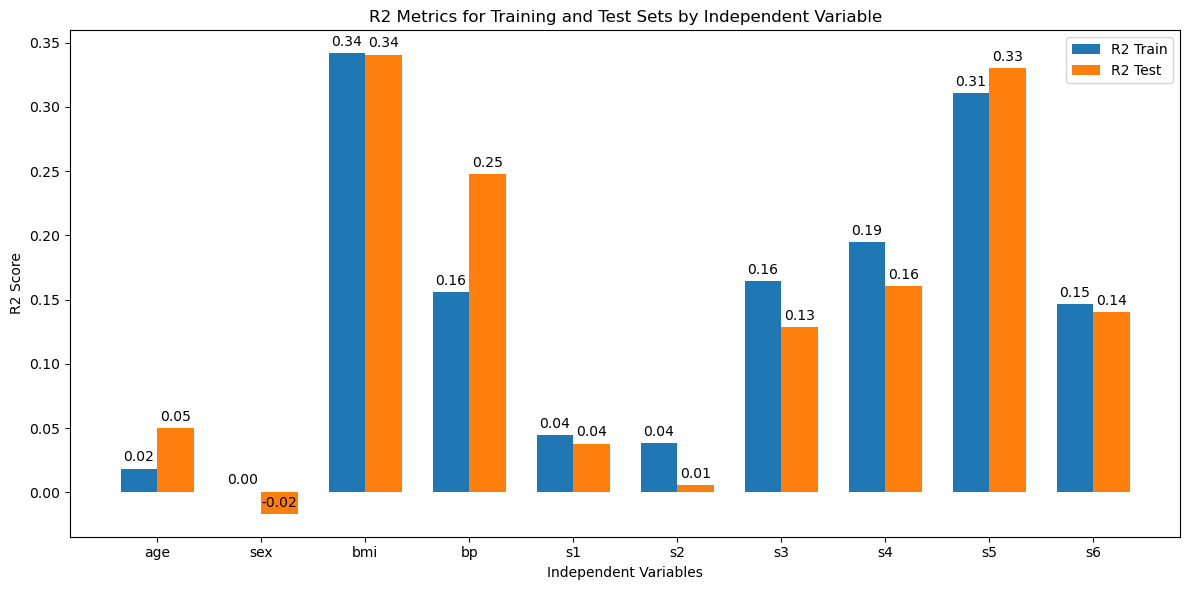

In [37]:
metrics_train = {
    iv: results['r2'] for iv, results in diabetes_results_train.items()
}
metrics_test = {
    iv: results['r2'] for iv, results in diabetes_results_test.items()
}

# Get the list of independent variables (IVs)
ind_vars = list(metrics_train.keys())

# Get corresponding R2 values for train and test
r2_train_values = [metrics_train[iv] for iv in ind_vars]
r2_test_values = [metrics_test[iv] for iv in ind_vars]

# Plotting R2 metrics for each IV
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate bar width and set bar positions
bar_width = 0.35
index = np.arange(len(ind_vars))

# Plot bars for R2 train and test
rects1 = ax.bar(index, r2_train_values, bar_width, label='R2 Train')
rects2 = ax.bar(index + bar_width, r2_test_values, bar_width, label='R2 Test')

# Add labels, title, and legend
ax.set_xlabel('Independent Variables')
ax.set_ylabel('R2 Score')
ax.set_title('R2 Metrics for Training and Test Sets by Independent Variable')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ind_vars)
ax.legend()

# Add value labels above each bar
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

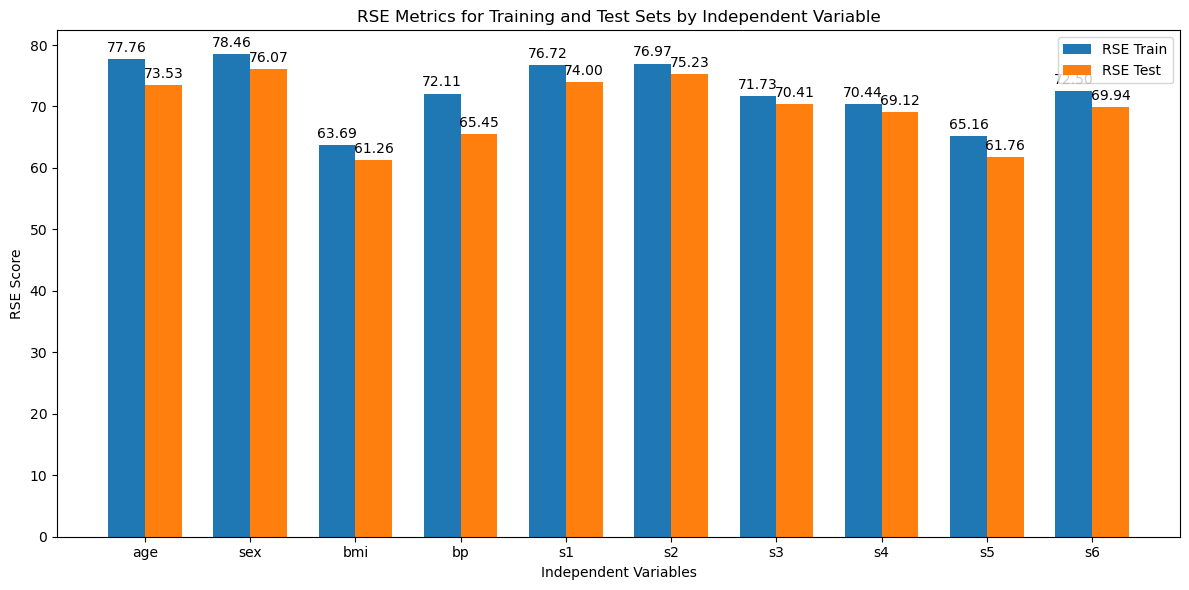

In [38]:
metrics_train = {
    iv: results['rse'] for iv, results in diabetes_results_train.items()
}
metrics_test = {
    iv: results['rse'] for iv, results in diabetes_results_test.items()
}

# Get the list of independent variables (IVs)
ind_vars = list(metrics_train.keys())

# Get corresponding RSE values for train and test
rse_train_values = [metrics_train[iv] for iv in ind_vars]
rse_test_values = [metrics_test[iv] for iv in ind_vars]

# Plotting RSE metrics for each IV
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate bar width and set bar positions
bar_width = 0.35
index = np.arange(len(ind_vars))

# Plot bars for RSE train and test
rects1 = ax.bar(index, rse_train_values, bar_width, label='RSE Train')
rects2 = ax.bar(index + bar_width, rse_test_values, bar_width, label='RSE Test')

# Add labels, title, and legend
ax.set_xlabel('Independent Variables')
ax.set_ylabel('RSE Score')
ax.set_title('RSE Metrics for Training and Test Sets by Independent Variable')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(ind_vars)
ax.legend()

# Add value labels above each bar
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### Step 5, part b: multivariate linear regressions

In [39]:
def multivariate_lm_train_test_split(X, y, test_size=0.4):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fit multivariate linear regression model on training data
    model = LinearRegression().fit(X_train, y_train)

    # Get predictions on training and test sets
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Number of observations (n) and number of predictors (p)
    n_train, p = X_train.shape
    n_test = X_test.shape[0]

    # Compute RSS on training set
    rss_train = np.sum((y_train - y_pred_train)**2)

    # Compute MSE on training set
    mse_train = mean_squared_error(y_train, y_pred_train)

    # Compute RSE on training set
    rse_train = np.sqrt(rss_train / (n_train - p - 1))

    # Compute R-squared (R^2) on training set
    r2_train = model.score(X_train, y_train)

    # Compute RSS on test set
    rss_test = np.sum((y_test - y_pred_test)**2)

    # Compute MSE on test set
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Compute RSE on test set
    rse_test = np.sqrt(rss_test / (n_test - p - 1))

    # Compute R-squared (R^2) on test set
    r2_test = model.score(X_test, y_test)

    # Calculate F-statistic on training set
    y_train_mean = np.mean(y_train)
    tss_train = np.sum((y_train - y_train_mean)**2)
    f_statistic_train = (tss_train - rss_train) / p / (rss_train / (n_train - p - 1))

    # Return results as dictionaries for training and test sets
    results_train = {
        'model': model,
        'rss': rss_train,
        'mse': mse_train,
        'rse': rse_train,
        'r2': r2_train,
        'f_statistic': f_statistic_train
    }

    results_test = {
        'model': model,
        'rss': rss_test,
        'mse': mse_test,
        'rse': rse_test,
        'r2': r2_test
    }

    return results_train, results_test

# Example usage with train-test split
diabetes_multi_results_train, diabetes_multi_results_test = multivariate_lm_train_test_split(X, y)

##### Visual comparison is best, yet again

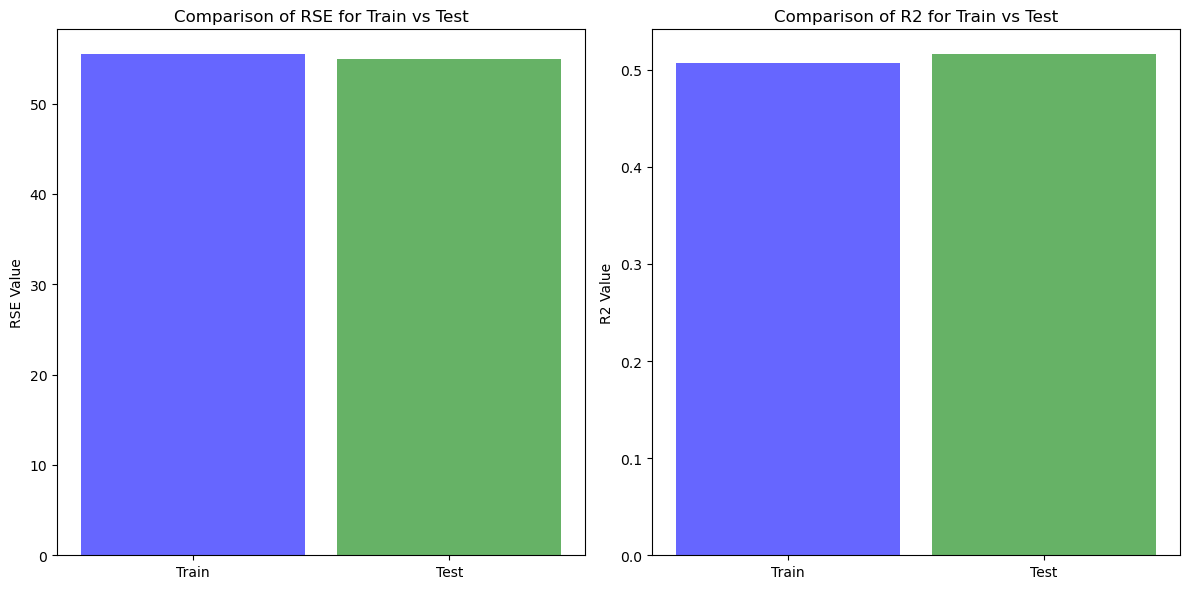

In [61]:
metrics_train_rse = metrics_train['RSE'][0]
metrics_train_r2 = metrics_train['R2'][0]

metrics_test_rse = metrics_test['RSE'][0]
metrics_test_r2 = metrics_test['R2'][0]

# Set positions for the bars
positions = [0.3, 0.7]  # Two positions: RSE and R2

# Set the width of the bars
bar_width = 0.35

# Create a bar plot for RSE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(positions, [metrics_train_rse, metrics_test_rse], width=bar_width, color=['b', 'g'], alpha=0.6)
ax1.set_xticks(positions)
ax1.set_xticklabels(['Train', 'Test'])
ax1.set_title('Comparison of RSE for Train vs Test')
ax1.set_ylabel('RSE Value')

# Create a bar plot for R2
ax2.bar(positions, [metrics_train_r2, metrics_test_r2], width=bar_width, color=['b', 'g'], alpha=0.6)
ax2.set_xticks(positions)
ax2.set_xticklabels(['Train', 'Test'])
ax2.set_title('Comparison of R2 for Train vs Test')
ax2.set_ylabel('R2 Value')

plt.tight_layout()
plt.show()
